In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style("whitegrid")

In [3]:
def F(FA, TR, T1, T2, PD, n: np.ndarray):
    E1 = np.exp(-TR/T1)
    E2 = np.exp(-TR/T2)
    A = 1-E1*np.cos(FA)
    B = E1-E1*np.cos(FA)
    a = E2*(B-A)/(A-B*E2**2)
    # b = (np.sqrt(1-a**2)-1)/a
    # c = PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))

    return PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))*(((np.sqrt(1-a**2)-1)/a)**np.abs(n)-E2*((np.sqrt(1-a**2)-1)/a)**np.abs(n+1))



def S(F, T2, T2_dash, omega_0, TR, TE: np.ndarray, n: np.ndarray):
    assert len(F) == len(TE) and len(F) == len(
        n), "F, TE and n must be of same length"
    return F*np.exp(-TE/T2)*np.exp(-np.abs(TE+TR*n)/T2_dash)*np.exp(1j*omega_0*(TE+TR*n))

def calc_params(FA, TR, TE_0, delta_TE, T1, T2, PD, T2_dash):
    E1 = np.exp(-TR/T1)
    E2 = np.exp(-TR/T2)
    A = 1-E1*np.cos(FA)
    B = E1-E1*np.cos(FA)
    a = E2*(B-A)/(A-B*E2**2)
    b = (np.sqrt(1-a**2)-1)/a
    c = PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))

    lambd_p = np.log(b)-delta_TE/T2-(delta_TE+TR)/T2_dash
    mu_p = np.log(c*(1-E2*b))-TE_0/T2-TE_0/T2_dash
    lambd_n = -np.log(b)-delta_TE/T2+(delta_TE+TR)/T2_dash
    mu_n = np.log(-c*(1-E2*b**(-1)))-TE_0/T2+TE_0/T2_dash

    return lambd_p, mu_p, lambd_n, mu_n


def S_magnitude(FA, TR, TE_0, delta_TE, T1, T2, PD, T2_dash, n):
    E1 = np.exp(-TR/T1)
    E2 = np.exp(-TR/T2)
    A = 1-E1*np.cos(FA)
    B = E1-E1*np.cos(FA)
    a = E2*(B-A)/(A-B*E2**2)
    b = (np.sqrt(1-a**2)-1)/a
    c = PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))

    log_S = np.zeros(len(n))
    for idx, n_, in enumerate(n):
        if n_>= 0:
            lambd = np.log(b)-delta_TE/T2-(delta_TE+TR)/T2_dash
            mu = np.log(c*(1-E2*b))-TE_0/T2-TE_0/T2_dash
            # log_S[idx] = np.log(c*(1-E2*b)) - TE_0/T2 - TE_0/T2_dash + n_*(np.log(b)-delta_TE/T2-(delta_TE+TR)/T2_dash)
            # log_S[idx] = np.log(c*(1-E2*b))  + n_*(np.log(b))
        else:
            lambd = -np.log(b)-delta_TE/T2+(delta_TE+TR)/T2_dash
            mu = np.log(-c*(1-E2*b**(-1)))-TE_0/T2+TE_0/T2_dash
            # log_S[idx] = np.log(-c*(1-E2*b**(-1))) - TE_0/T2 + TE_0/T2_dash + n_*(-np.log(b)-delta_TE/T2+(delta_TE+TR)/T2_dash)
            # log_S[idx] = np.log(-c*(1-E2*b**(-1))) + n_*(-np.log(b))
        log_S[idx] = mu + n_*lambd

    return np.exp(log_S)

In [4]:
# 3T Gray Matter
param_GM = {
    "PD": 0.8,
    "T1": 1.56,
    "T2": 0.083,
    "T2_dash": 0.32
}
# 3T White Matter
param_WM = {
    "PD": 0.7,
    "T1": 0.83,
    "T2": 0.075,
    "T2'": 0.18,
}
# 3T CSF
param_CSF = {
    "PD": 1,
    "T1": 4.16,
    "T2": 1.65,
    "T2'": 0.059,
}
# 3T Fat
param_FAT = {
    "PD": 1,
    "T1": 0.37,
    "T2": 0.125,
    "T2'": 0.012,
}

[0.0094 0.0096 0.0098 0.01   0.0102 0.0104 0.0106 0.0108]


/tmp/ipykernel_3343808/3415271293.py:49: RuntimeWarning: divide by zero encountered in log
  mu = np.log(c*(1-E2*b))-TE_0/T2-TE_0/T2_dash
/tmp/ipykernel_3343808/3415271293.py:54: RuntimeWarning: divide by zero encountered in log
  mu = np.log(-c*(1-E2*b**(-1)))-TE_0/T2+TE_0/T2_dash
/tmp/ipykernel_3343808/3415271293.py:29: RuntimeWarning: divide by zero encountered in log
  mu_p = np.log(c*(1-E2*b))-TE_0/T2-TE_0/T2_dash
/tmp/ipykernel_3343808/3415271293.py:31: RuntimeWarning: divide by zero encountered in log
  mu_n = np.log(-c*(1-E2*b**(-1)))-TE_0/T2+TE_0/T2_dash


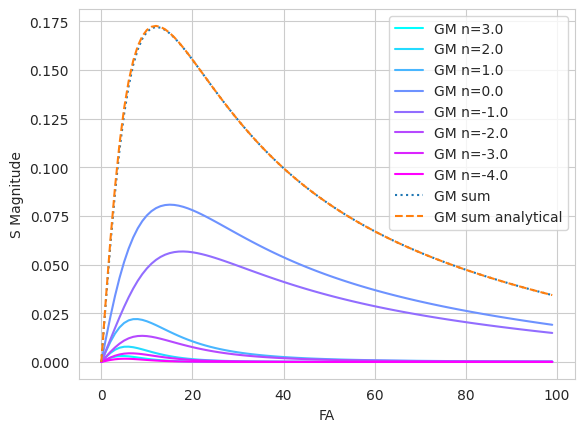

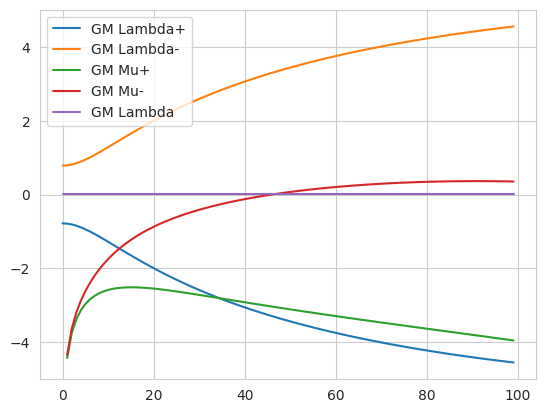

0.08300000000000127


/tmp/ipykernel_3343808/1675482755.py:62: RuntimeWarning: invalid value encountered in divide
  plt.plot(FA_deg, (S_GM[:,idx])/sum_S_GM, label=f"GM n={n_}", c=colors[idx])


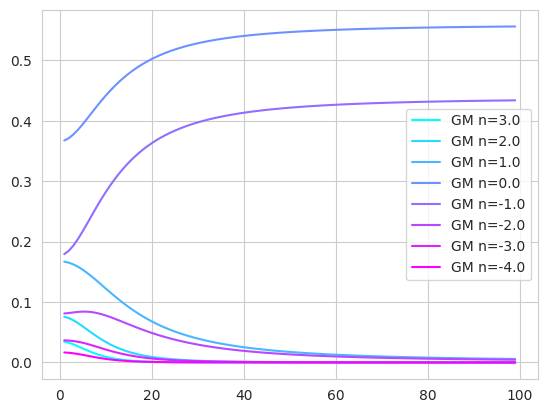

In [24]:
FA_deg = np.arange(0, 100, 1)
FA = np.deg2rad(FA_deg)
n_start = +3
n_end = -4
# n_start = -4 
# n_end = +3
n = np.linspace(n_start, n_end, np.abs(n_end-n_start)+1, endpoint=True)
TR = 20e-3
TE_0 = 10e-3
delta_TE = -2e-4
TE = n*delta_TE+TE_0
print(TE)

S_GM=[]

lambd_p_GM=[]
lambd_n_GM=[]
mu_p_GM=[]
mu_n_GM=[]

for FA_ in FA:
    S_GM.append(S_magnitude(FA_, TR, TE_0, delta_TE, param_GM["T1"], param_GM["T2"], param_GM["PD"], param_GM["T2_dash"], n))
    lambd_p, mu_p, lambd_n, mu_n = calc_params(FA_, TR, TE_0, delta_TE, param_GM["T1"], param_GM["T2"], param_GM["PD"], param_GM["T2_dash"])
    lambd_p_GM.append(lambd_p)
    lambd_n_GM.append(lambd_n)
    mu_p_GM.append(mu_p)
    mu_n_GM.append(mu_n)

S_GM = np.array(S_GM)
lambd_p_GM = np.array(lambd_p_GM)
lambd_n_GM = np.array(lambd_n_GM)
mu_p_GM = np.array(mu_p_GM)
mu_n_GM = np.array(mu_n_GM)

sum_S_GM = np.exp(mu_p_GM)/(1-np.exp(lambd_p_GM)) + np.exp(mu_n_GM)/(np.exp(lambd_n_GM)-1)

cmap = plt.get_cmap('cool')
colors = [cmap(i) for i in np.linspace(0,1,len(n),endpoint=True)]
for idx,n_ in enumerate(n):
    plt.plot(FA_deg, np.abs(S_GM[:,idx]), label=f"GM n={n_}", c=colors[idx])
    # plt.plot(FA_deg, np.abs(S_WM[:,idx]), label=f"WM n={n_}", c="g")
plt.plot(FA_deg, np.sum(S_GM,axis=1), label="GM sum", ls=":")
plt.plot(FA_deg, sum_S_GM, label="GM sum analytical", ls="--")

plt.xlabel("FA")
plt.ylabel("S Magnitude")
# plt.yscale("log")
plt.legend()
plt.show()

plt.plot(FA_deg, lambd_p_GM, label="GM Lambda+")
plt.plot(FA_deg, lambd_n_GM, label="GM Lambda-")
plt.plot(FA_deg, mu_p_GM, label="GM Mu+")
plt.plot(FA_deg, mu_n_GM, label="GM Mu-")
plt.plot(FA_deg, (lambd_p_GM+lambd_n_GM), label="GM Lambda")
plt.legend()
plt.show()

print(-2*delta_TE/(lambd_p_GM+lambd_n_GM)[1])

for idx,n_ in enumerate(n):
    plt.plot(FA_deg, (S_GM[:,idx])/sum_S_GM, label=f"GM n={n_}", c=colors[idx])
plt.legend()
plt.show()
